### *Importing & Loading what we need* 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

data = pd.read_csv('DataSet/loan_approval_dataset.csv')

In [2]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### *Data Preprocessing*

In [3]:
print("\nShape of the dataset:", data.shape)


Shape of the dataset: (4269, 13)


In [4]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433

In [5]:
print("\nMissing values in each column:")
data.isnull().sum()


Missing values in each column:


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
print("\nStatistical Summary:")
data.describe()


Statistical Summary:


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(numerical_cols))

Numerical Columns: 10


In [8]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", len(categorical_cols))

Categorical Columns: 3


### *EDA & Data Visualisation* 

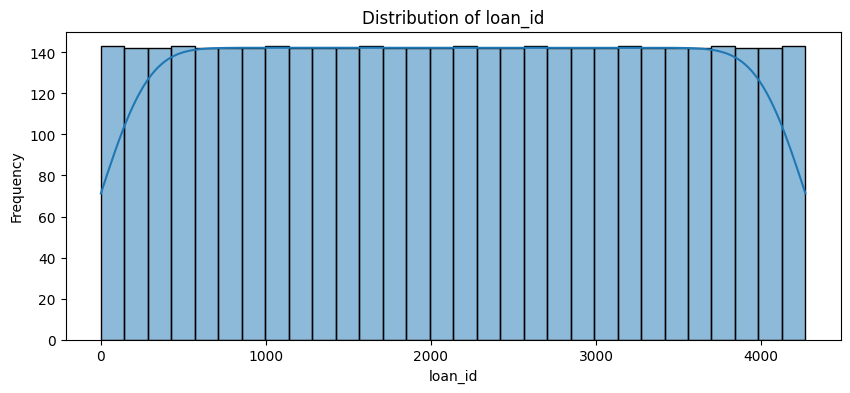

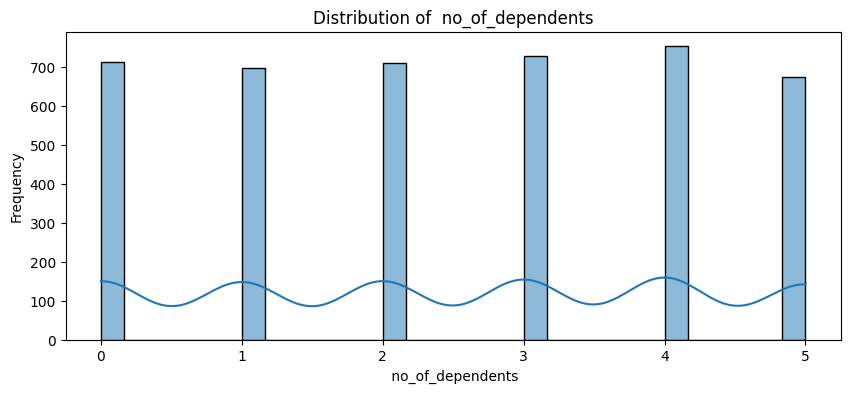

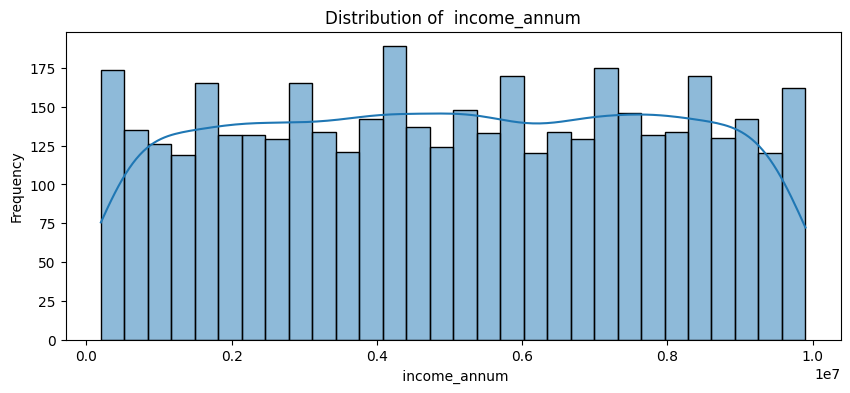

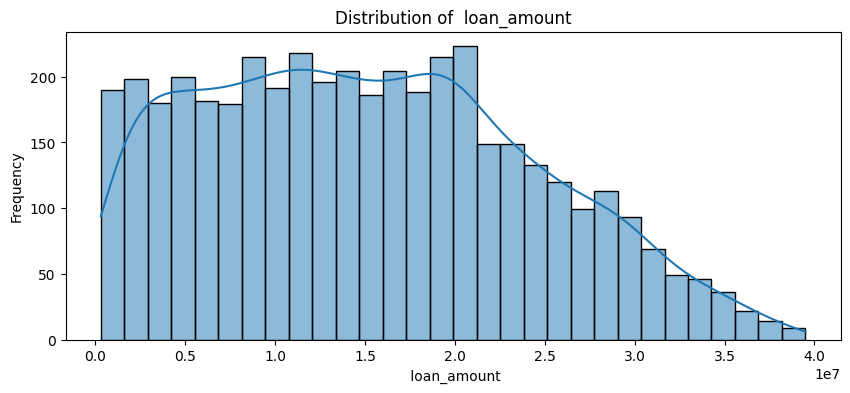

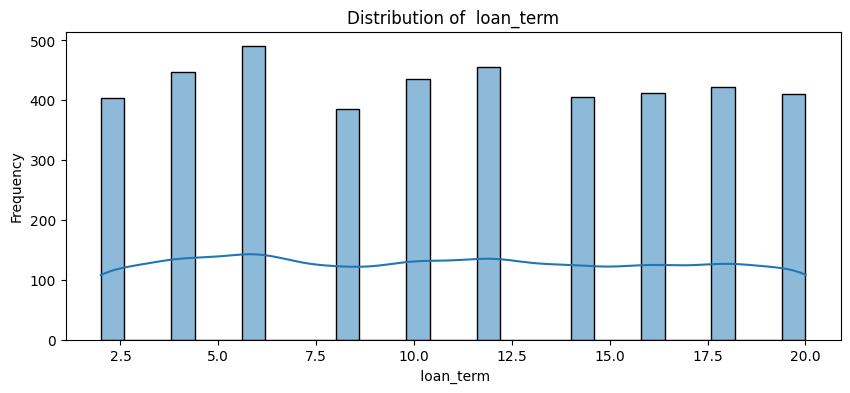

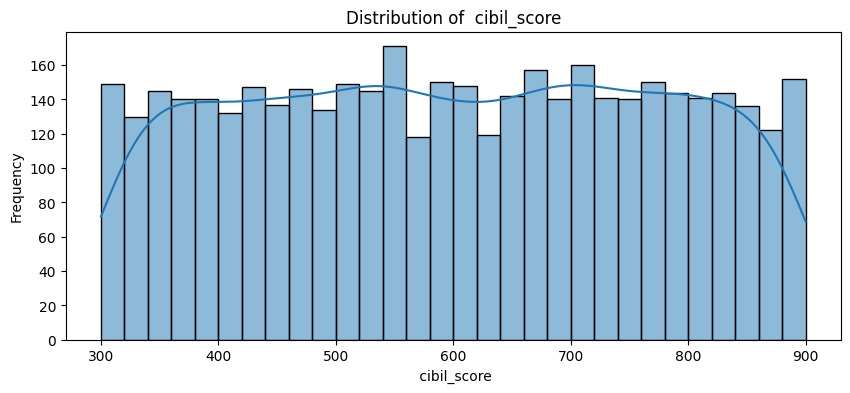

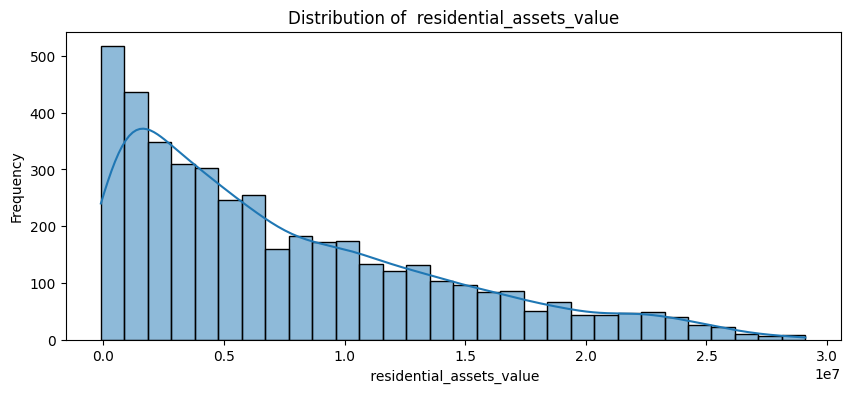

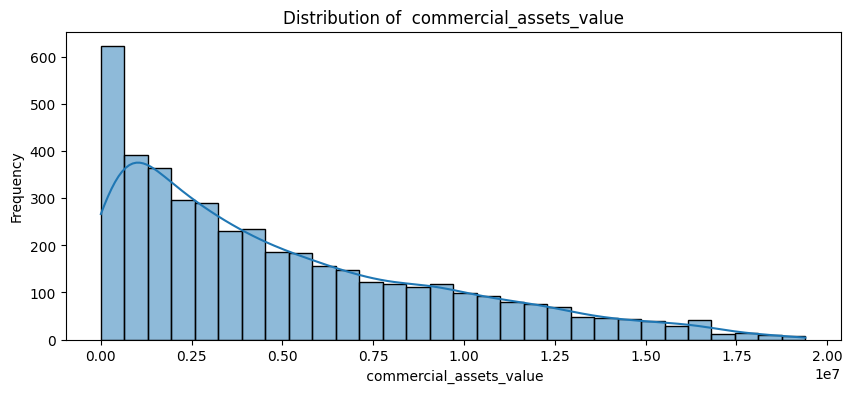

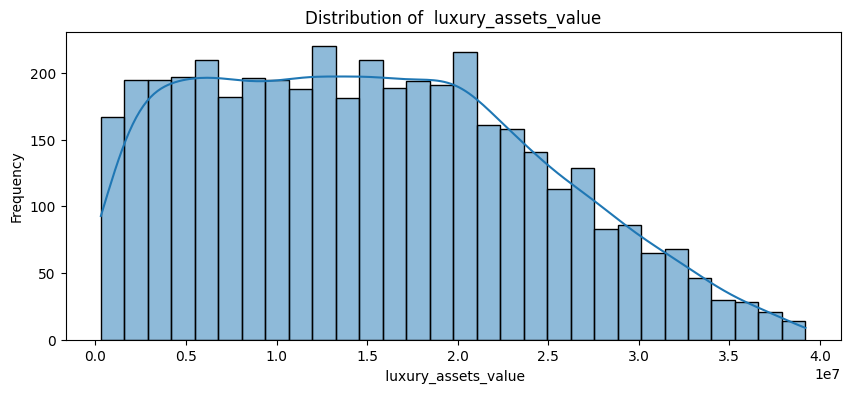

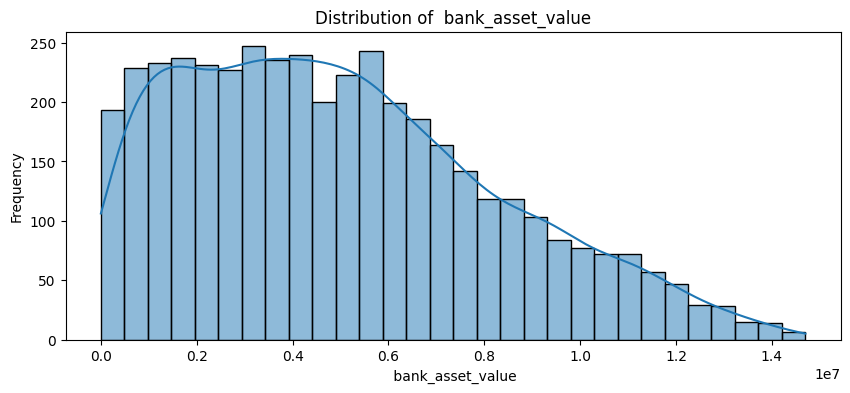

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

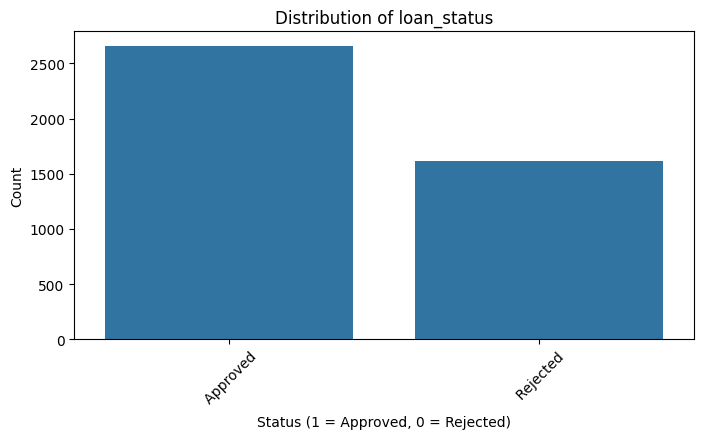

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x=' loan_status', data=data)
plt.title('Distribution of loan_status')
plt.xlabel('Status (1 = Approved, 0 = Rejected)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* ***Insight:*** The dataset is imbalanced, with more Approved loans (status = 1) than those Rejected ones (status = 0). This imbalance may bias machine learning models toward predicting approvals, so resampling techniques (SMOTE) should be considered to handle this imbalance.

### *Check & Removing outliers identified using IQR*

In [12]:
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR)))
outliers_iqr = outlier_condition.any(axis=1)
print(f'Number of outlier rows using IQR: {np.sum(outliers_iqr)}')

Number of outlier rows using IQR: 91


In [13]:
data_cleaned = data[~outliers_iqr] 

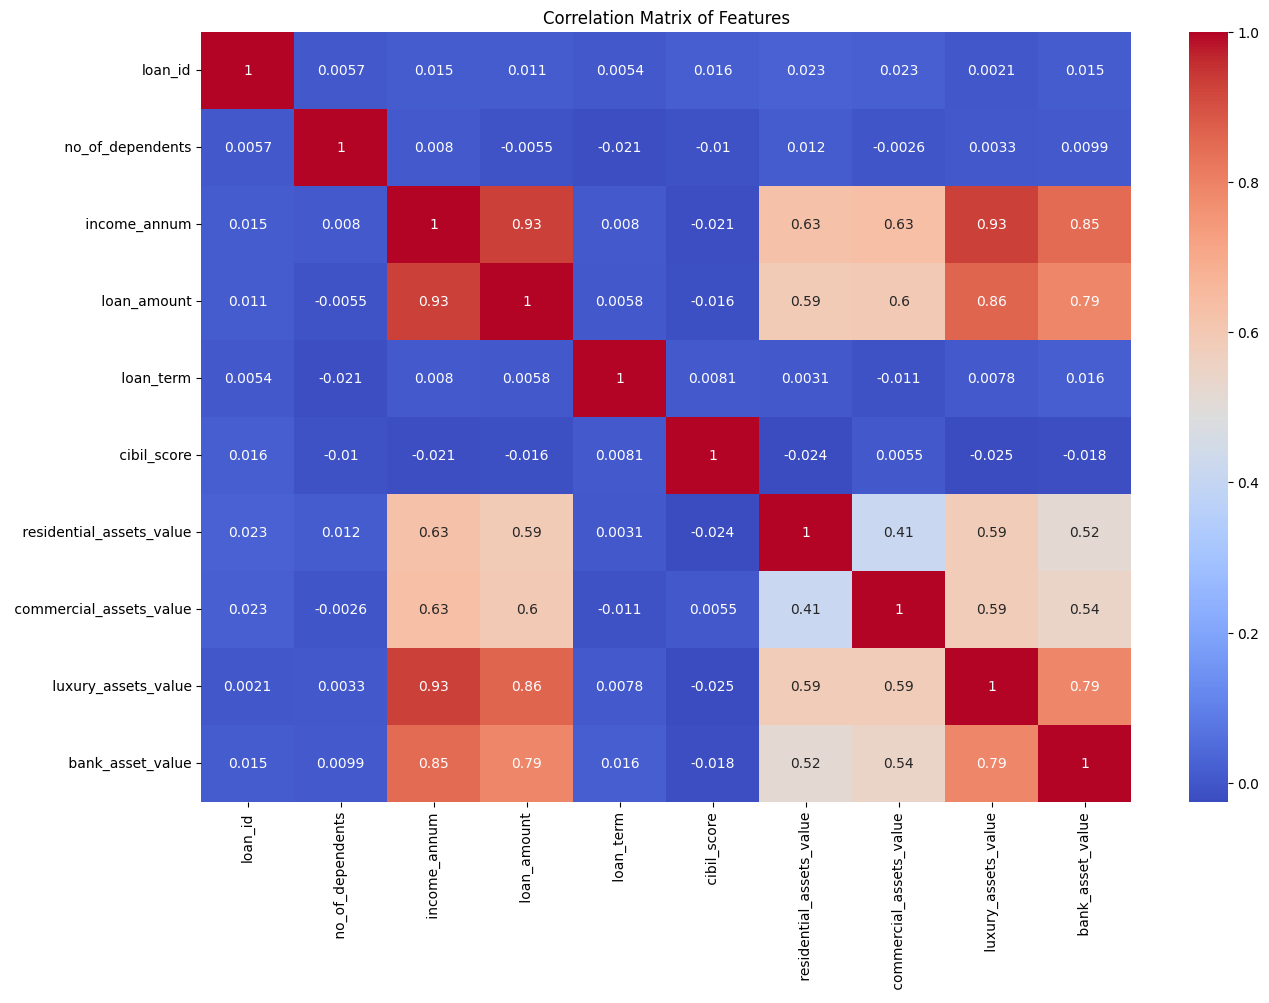

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_cleaned.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

### *Converting Categorical features to Numerical features*

In [15]:
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    encoders[col] = le

/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_2682/3240690475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_2682/3240690475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_2682/3240690475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

### *ANOVA Test*

In [16]:
for col in categorical_cols:
    groups = [data_cleaned[data_cleaned[col] == cat][' loan_status'] for cat in data_cleaned[col].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"{col}: F = {f_stat:.3f}, p = {p_val:.4f}")

 education: F = 0.055, p = 0.8152
 self_employed: F = 0.013, p = 0.9097
 loan_status: F = inf, p = 0.0000


/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_2682/3613454074.py:3: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  f_stat, p_val = stats.f_oneway(*groups)


### *Model Training*

In [25]:
data_cleaned.columns = data_cleaned.columns.str.strip()

In [27]:
X = data_cleaned.drop(columns=['self_employed', 'education', 'loan_id','luxury_assets_value', 'bank_asset_value','loan_status'], axis=1)
y = data_cleaned['loan_status']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y,random_state=42)

smote = SMOTE(random_state=2)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/Users/amrkhaled/Documents/Data Science/studysession/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

print("Baseline Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Baseline Logistic Regression Accuracy: 0.9198564593301436
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       521
           1       0.87      0.93      0.90       315

    accuracy                           0.92       836
   macro avg       0.91      0.92      0.92       836
weighted avg       0.92      0.92      0.92       836



### *Hyperparameter Tuning (GridSearchCV)*

In [30]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'],  
    'class_weight': [None, 'balanced']  
}

# GridSearchCV setup
grid_search = GridSearchCV(
    LogisticRegression(max_iter=5000, random_state=42),
    param_grid,
    scoring='f1',  
    cv=5,
    n_jobs=-1
)


grid_search.fit(X_train_scaled, y_train)

# Best model & parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred_best = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best)

In [31]:
print(f"\nBest Parameters: {best_params}")
print(f"Accuracy of the tuned Logistic Regression model: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
Accuracy of the tuned Logistic Regression model: 93.78%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       521
           1       0.89      0.96      0.92       315

    accuracy                           0.94       836
   macro avg       0.93      0.94      0.93       836
weighted avg       0.94      0.94      0.94       836



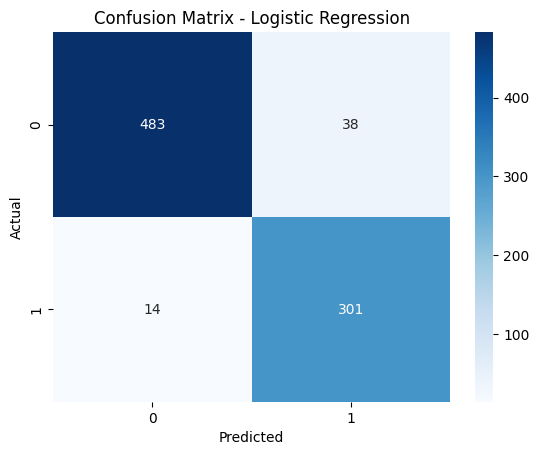

In [32]:
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler_loan.pkl", "wb") as f:
    pickle.dump(scaler, f)